<a href="https://colab.research.google.com/github/pir8scallywag/CSCItopicsproject/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM
from tensorflow import compat

In [ ]:
# load the data
df = pd.read_csv('/content/cleaned_data.csv')

# preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['AverageTemperatureFahr']].values)

# create the training and testing data
train_size = int(len(scaled_data) * 0.8)
X_train, y_train = [], []
for i in range(60, train_size):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(train_size, len(scaled_data)):
    X_test.append(scaled_data[i-60:i, 0])
    y_test.append(scaled_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
1175/1175 [==============================] - 26s 14ms/step - loss: 0.0087
Epoch 2/100
1175/1175 [==============================] - 11s 9ms/step - loss: 0.0021
Epoch 3/100
1175/1175 [==============================] - 9s 8ms/step - loss: 0.0020
Epoch 4/100
1175/1175 [==============================] - 10s 8ms/step - loss: 0.0019
Epoch 5/100
1175/1175 [==============================] - 11s 10ms/step - loss: 0.0019
Epoch 6/100
1175/1175 [==============================] - 11s 9ms/step - loss: 0.0019
Epoch 7/100
1175/1175 [==============================] - 10s 8ms/step - loss: 0.0018
Epoch 8/100
1175/1175 [==============================] - 11s 9ms/step - loss: 0.0018
Epoch 9/100
1175/1175 [==============================] - 9s 8ms/step - loss: 0.0018
Epoch 10/100
1175/1175 [==============================] - 9s 8ms/step - loss: 0.0018
Epoch 11/100
1175/1175 [==============================] - 10s 8ms/step - loss: 0.0018
Epoch 12/100
1175/1175 [==============================] - 9s 8ms

In [ ]:
model.save('/content/model.h5')

In [ ]:
model = load_model('/content/model.h5')

In [ ]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# calculate the mean squared error
train_mse = np.mean((train_predict - y_train) ** 2)
test_mse = np.mean((test_predict - y_test) ** 2)
print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)

Training Mean Squared Error: 7.999377207215972
Testing Mean Squared Error: 19.63593893767632


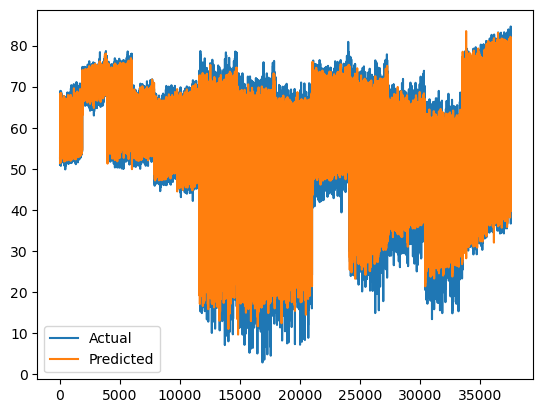

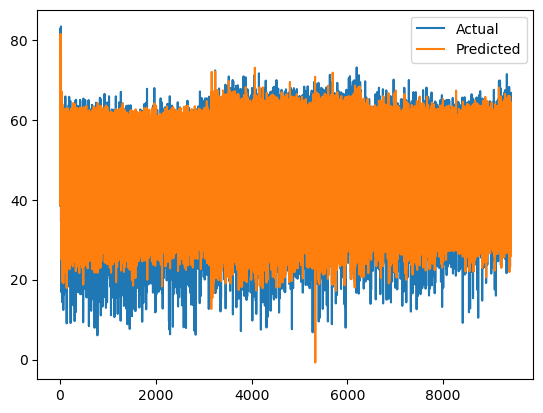

In [ ]:
# plot the predicted and actual values
plt.plot(y_train, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.legend()
plt.show()

plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.legend()
plt.show()

In [ ]:
def predict_temperature(date_str):
    # load the trained model
    model = load_model('/content/model.h5')

    # load the data
    df = pd.read_csv('/content/cleaned_data.csv')

    # preprocess the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[['AverageTemperatureFahr']].values)

    # get the input date
    date = pd.to_datetime(date_str)

    # get the past 60 days of data
    idx = df[(df['month'] == date.month) & (df['day'] == date.day) & (df['year'] == date.year)].index[0]
    X = scaled_data[idx-60:idx, 0]
    X = np.reshape(X, (1, 60, 1))

    # make the prediction
    prediction = scaler.inverse_transform(model.predict(X))[0][0]

    return prediction

prediction = predict_temperature('2013-06-01')
print(prediction)


56.582367
